# HW 1 - Problem 1

Write a program which calculates the distance a projectile of a mass, m will travel when shot
out of a cannon at an angle θ from the ground with an initial speed v. Plot the dependence of the
distance on m, θ and v for the following cases. Your values of m should be between 0.1 and 10 kg,
θ from 0 to 90 degrees and v should span at least two orders of magnitude, however the exact values
are yours to determine.<br>
a) Earth<br>
b) Mars<br>
c) Titan <br>
d) Ceres

In order to solve this problem we will use the equations: <br>
$$d=v\cos\theta \cdot t -----(1) $$ and $$h=v\sin\theta\cdot t + \frac{at^2}{2} -----(2)$$ where d = horizontal distance of projectile, t=total time, h=vertical height, a=acceleration, and $\theta$=angle.<br>,<br>

When the object reaches the ground again we have:<br>
$$0=v\sin\theta\cdot t -\frac{gt^2}{2}$$
Thus the total time taken for the projectile is $$t=\frac{2v\sin\theta}{g}$$
and the total distance travelled is $$d=\frac{2v^2\sin\theta\cos\theta}{g} $$

In [1]:
#import libraries
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Assign values for gravitational constants of Earth, Mars, Titan, Ceres
g_Earth=9.8
g_Mars=3.711
g_Titan=1.352
g_Ceres=0.27

#Arrays of mass, angle, and velocity
m=np.linspace(0.1,10,100)

#array from 0 to pi/2
theta=np.linspace(0,np.pi/2,100)

#velocity array from 0 to 100
v=np.linspace(0,100,100)

In [3]:
def d(g,theta,v):
    """Calculates the total distance of the projectile"""
    '''Inputs: gravitational constant, angle, velocity'''
    '''Output: Distance of projectile'''
    return 2*v*v*np.sin(theta)*np.cos(theta)/g

In [4]:
#Define a vectorized function
d=np.vectorize(d) 

In [5]:
def plot(variable):
    '''Plots the Distance vs Velocity/Mass/Angle
       given the variable'''
    names=['Earth','Mars','Titan','Ceres']
    if(variable=='Velocity'):
        plt.title('Distance vs {} at theta=45 $\degree$'.format(variable),size=15)
        unit='m/s'
        #plots the distance keeping theta constant and varying v
        plt.plot(v,d(g_Earth,np.pi/4,v),'b-',v,d(g_Mars,np.pi/4,v),'r-',
                 v,d(g_Titan,np.pi/4,v),'k-', v,d(g_Ceres,np.pi/4,v),'g-')
    elif(variable=='Mass'):
        unit='kg'
        plt.title('Distance vs {} , theta=45 $\degree$'.format(variable),size=15)
        #plots Distance vs mass keeping constant angle=pi/4 rad,v=10m/s 
        plt.plot(m,d(g_Earth,np.pi/4,np.full(100,10)),'b-',m,d(g_Mars,np.pi/4,np.full(100,10)),'r-',
                 m,d(g_Titan,np.pi/4,np.full(100,10)),'k-',m,d(g_Ceres,np.pi/4,np.full(100,10)),'g-')
    elif(variable=='Angle'):
        unit='$\degree$'
        plt.title('Distance vs {} at v=10 m/s'.format(variable),size=15)
        plt.plot(theta*180/np.pi,d(g_Earth,theta,10),'b-',theta*180/np.pi,d(g_Mars,theta,10),'r-',
                 theta*180/np.pi,d(g_Titan,theta,10),'k-', theta*180/np.pi,d(g_Ceres,theta,10),'g-')
        
    plt.xlabel('{} [{}]'.format(variable,unit),size=15)
    plt.ylabel('log(Distance) [m]',size=15)
    plt.yscale('log')
    plt.legend(names)
    return plt.savefig('{}.pdf'.format(variable))
    

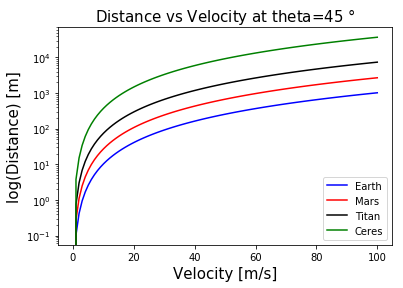

In [6]:
plot('Velocity')

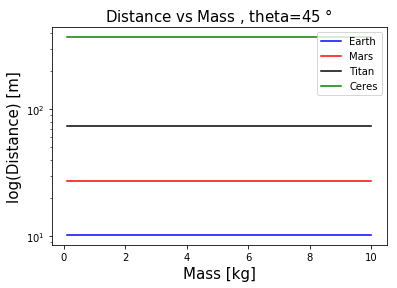

In [7]:
plot('Mass')

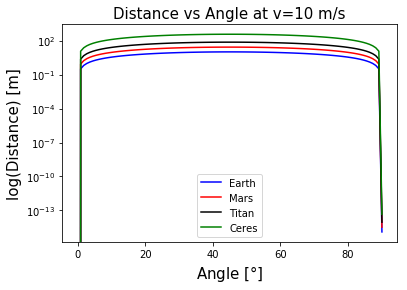

In [8]:
plot('Angle')

Longest Distance is reached by the projectile in both cases with changing velocity and angle.
However, distance is not dependent on mass.